<a href="https://colab.research.google.com/github/ninivehelen/Modelos_Machine_Learning/blob/master/Machine_learning_Balanceado_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando bibliotecas**

In [598]:
import pandas as pd
import numpy as np
import seaborn as sns

**Lendo dos dados**

In [642]:
df_bank = pd.read_csv("/content/bank-full.csv")

In [972]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_numeric,marital_numeric,education_numeric,housing_numeric,loan_numeric,default_numeric
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4,1,2,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,9,2,1,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2,1,1,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,1,3,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,11,2,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,9,1,2,0,0,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,5,0,0,0,0,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,5,1,1,0,0,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,1,1,1,0,0,0


**Verificando se possui dados faltantes**

In [644]:
dados_nulos = df_bank.isnull().sum()

In [645]:
print(dados_nulos)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


# **Aplicando o Machine Learning**

**Transformando dados categoricos em numericos**

In [646]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [647]:
label_encoder = LabelEncoder()

label_job = label_encoder.fit_transform(df_bank.job)

label_marital = label_encoder.fit_transform(df_bank.marital)

label_education = label_encoder.fit_transform(df_bank.education)

label_housing= label_encoder.fit_transform(df_bank.housing)

label_loan_numeric= label_encoder.fit_transform(df_bank.loan)

label_default_numeric= label_encoder.fit_transform(df_bank.default)

label_poutcome_numeric= label_encoder.fit_transform(df_bank.poutcome)



In [794]:
df_bank["job_numeric"] = label_job
df_bank["marital_numeric"] = label_marital
df_bank["education_numeric"] = label_education
df_bank["housing_numeric"] = label_housing
df_bank["loan_numeric"] = label_loan_numeric
df_bank["default_numeric"] = label_default_numeric


**Separando dados de treino e teste**

In [831]:
X = df_bank[["age","job_numeric","marital_numeric","education_numeric","default_numeric","balance","housing_numeric","duration","campaign"]].values
y = df_bank["loan_numeric"].values

In [832]:
from sklearn.model_selection import train_test_split

In [935]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
random_state = 0)



In [936]:
from sklearn.preprocessing import StandardScaler

In [937]:
# Colocando os dados na mesma escala 

In [938]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [939]:
from sklearn.linear_model import LogisticRegression

In [940]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [941]:
y_pred = classifier.predict(X_test)

In [942]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [943]:
print(y_test)

[0 0 1 ... 0 0 1]


In [944]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)

In [945]:
print(matriz)

[[7572    0]
 [1470    1]]


In [946]:
#Analisando os dados, nota-se que existe uma desbalanceamento,
#pois os dados loan em mais 0 do que 1. então o modelo prever mais os 0 por conta
# desse desbalanceamento

AxesSubplot(0.125,0.125;0.775x0.755)


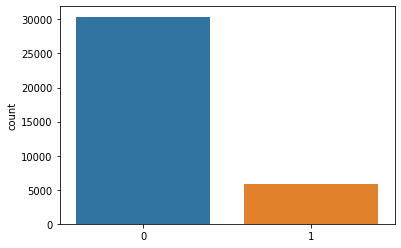

In [993]:
# Grafico da quantidade de dados
print(sns.countplot(y_train));

In [994]:
# Para resolver o problema temos que balancear os dados Loan

In [949]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [950]:
print("Acurácia: {:.2f}\n".format(accuracy_score(y_test, y_pred)))

Acurácia: 0.84



In [951]:
# a accuracy foi alta por que o modelo apenas previu todos os 0. 

**Relatório do modelo**

In [952]:
print("Relatório do desempenho \n", classification_report(y_test, y_pred, digits=4))

print("Acurácia: {:.2f}\n".format(accuracy_score(y_test, y_pred)))

Relatório do desempenho 
               precision    recall  f1-score   support

           0     0.8374    1.0000    0.9115      7572
           1     1.0000    0.0007    0.0014      1471

    accuracy                         0.8374      9043
   macro avg     0.9187    0.5003    0.4564      9043
weighted avg     0.8639    0.8374    0.7635      9043

Acurácia: 0.84



In [953]:
# Como os dados estão desbalanceados o modelo so previu os 0 

**Balanceando os dados utilizando sklearn**

In [954]:
from imblearn.under_sampling import RandomUnderSampler

1    5773
0    5773
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


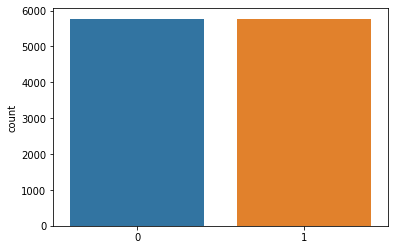

In [992]:
rus = RandomUnderSampler()
X_train_2, y_train_2 = rus.fit_sample(X_train, y_train)

# ver o balanceamento dos dados

print(pd.Series(y_train_2).value_counts())

# Grafico da quantidade de dados
print(sns.countplot(y_train_2))

**Dados Balanceados**

In [956]:
classifier_2 = LogisticRegression()
classifier_2.fit(X_train_2, y_train_2)

LogisticRegression()

In [957]:
# Fazendo a predição dos dados

In [958]:
y_pred_2 = classifier_2.predict(X_test)


In [959]:
# Dados previstos 

In [960]:
print(y_pred_2)

[1 0 1 ... 1 0 1]


In [961]:
# Dados de teste

In [962]:
print(y_test)

[0 0 1 ... 0 0 1]


**Matriz de confusão**

In [963]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred_2)

In [964]:
print(matriz)

[[4020 3552]
 [ 552  919]]


In [965]:
# Accuracy do novo modelo com dados balanceados

In [966]:
print("Acurácia: {:.2f}\n".format(accuracy_score(y_test, y_pred_2)))

Acurácia: 0.55



**Gerando relatório do desempenho**

In [967]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score


In [968]:
print("Relatório do desempenho \n", classification_report(y_test, y_pred_2, digits=4))

print("Acurácia: {:.2f}\n".format(accuracy_score(y_test, y_pred_2)))

Relatório do desempenho 
               precision    recall  f1-score   support

           0     0.8793    0.5309    0.6621      7572
           1     0.2055    0.6247    0.3093      1471

    accuracy                         0.5462      9043
   macro avg     0.5424    0.5778    0.4857      9043
weighted avg     0.7697    0.5462    0.6047      9043

Acurácia: 0.55

